In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sportsref.baseball import Season
import seaborn as sns

In [2]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [10]:
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.04)

In [4]:
szn21 = Season(2021).batting_pages("standard")

Available tables: ['teams_standard_batting', 'players_standard_batting']


In [5]:
df = szn21.get_df("teams_standard_batting")

In [6]:
# df.plot(
#     kind="scatter",
#     x="LOB",
#     y="R"
# )

In [7]:
plot_df = df[df.Tm != 'LgAvg']

In [8]:
plt.xkcd()

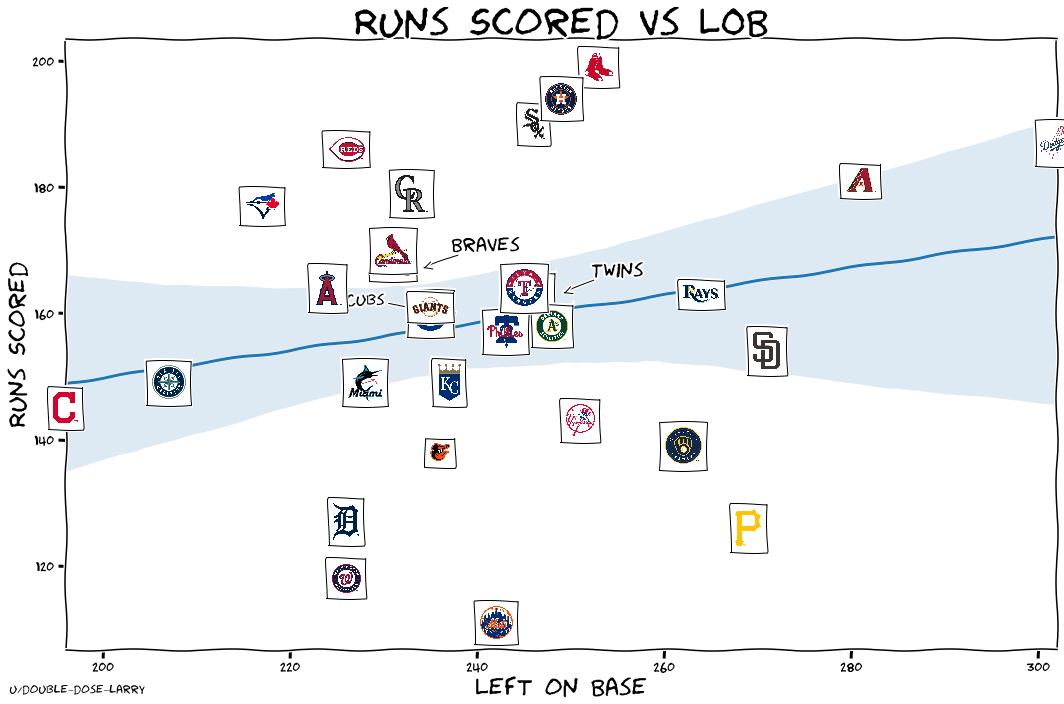

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

sns.regplot(df['LOB'], df['R'])

# ax.scatter(df['LOB'], df['R'])

imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{tm.Tm}.png'),
                      (tm.LOB, tm.R),
                       frameon=True
                      )
    )
    for tm in plot_df.itertuples()
]

## annotate the atl
tm = plot_df.query('Tm == "ATL"').iloc[0]
ax.annotate(
    "Braves",
    (tm["LOB"]+3, tm["R"]),
    size=20,
    xytext = (30, 20),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

## annotate the cubs
tm = plot_df.query('Tm == "CHC"').iloc[0]
ax.annotate(
    "Cubs",
    (tm["LOB"]+3, tm["R"]),
    size=16,
    xytext = (-113, 10),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)

## annotate the atl
tm = plot_df.query('Tm == "MIN"').iloc[0]
ax.annotate(
    "Twins",
    (tm["LOB"]+3, tm["R"]),
    size=20,
    xytext = (30, 20),
        textcoords="offset pixels",
        arrowprops=dict(
                     arrowstyle="->")
)


plt.xlabel("Left on Base", size=25)
plt.ylabel("Runs Scored", size=25)
plt.title("Runs Scored vs LOB", size=40)
plt.tight_layout()
plt.text(190,100,'u/double_dose_larry', size=12)
plt.savefig("lob_v_runs.png")
